In [1]:
# exercise 5.2.1

from matplotlib.pyplot import figure, plot, xlabel, ylabel, title, show
import numpy as np

# Number of data objects
N = 100

# Attribute values
X = np.array(range(N))

# Noise
eps_mean, eps_std = 0, 0.1
eps = np.array(eps_std*np.random.randn(N) + eps_mean)

# Model parameters
w0 = -0.5
w1 = 0.01

# Outputs
y = w0 + w1*X + eps

# Make a scatter plot
figure()
plot(X,y,'o')
xlabel('X'); ylabel('y')
title('Illustration of a linear relation with noise')

show()

print('Ran Exercise 5.2.1')

<Figure size 640x480 with 1 Axes>

Ran Exercise 5.2.1


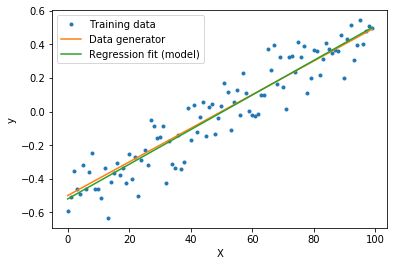

Ran Exercise 5.2.2


In [19]:
# exercise 5.2.2

from matplotlib.pyplot import figure, plot, xlabel, ylabel, legend, show
import sklearn.linear_model as lm
import numpy as np

# Use dataset as in the previous exercise
N = 100
X = np.array(range(N)).reshape(-1,1)
eps_mean, eps_std = 0, 0.1
eps = np.array(eps_std*np.random.randn(N) + eps_mean).reshape(-1,1)
w0 = -0.5
w1 = 0.01
y = w0 + w1*X + eps
y_true = y - eps

# Fit ordinary least squares regression model
model = lm.LinearRegression(fit_intercept=True)
model = model.fit(X,y)
# Compute model output:
y_est = model.predict(X)
# Or equivalently:
#y_est = model.intercept_ + X @ model.coef_


# Plot original data and the model output
f = figure()

plot(X,y,'.')
plot(X,y_true,'-')
plot(X,y_est,'-')
xlabel('X'); ylabel('y')
legend(['Training data', 'Data generator', 'Regression fit (model)'])

show()

print('Ran Exercise 5.2.2')

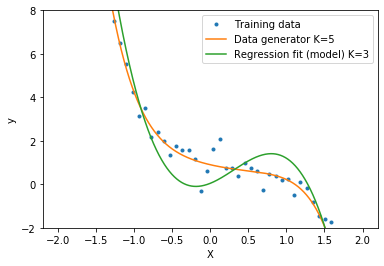

Ran Exercise 5.2.3


In [2]:
# exercise 5.2.3

from matplotlib.pyplot import figure, plot, xlabel, ylabel, legend, show, ylim
import numpy as np
import sklearn.linear_model as lm

# Parameters
Kd = 5  # no of terms for data generator
Km = 3  # no of terms for regression model
N = 50  # no of data objects to train a model
Xe =  np.linspace(-2,2,1000).reshape(-1,1) # X values to visualize true data and model
eps_mean, eps_std = 0, 0.5          # noise parameters

# Generate dataset (with noise)
X = np.linspace(-2,2,N).reshape(-1,1)
Xd = np.power(X, range(1,Kd+1))
eps = (eps_std*np.random.randn(N) + eps_mean)
w = -np.power(-.9, range(1,Kd+2))
y = w[0] + Xd @ w[1:] + eps 


# True data generator (assuming no noise)
Xde = np.power(Xe, range(1,Kd+1))
y_true = w[0] + Xde @ w[1:]



# Fit ordinary least squares regression model
Xm = np.power(X, range(1,Km+1))
model = lm.LinearRegression()
model = model.fit(Xm,y)

# Predict values
Xme = np.power(Xe, range(1,Km+1))
y_est = model.predict(Xme)

# Plot original data and the model output
f = figure()
plot(X,y,'.')
plot(Xe,y_true,'-')
plot(Xe,y_est,'-')
xlabel('X'); ylabel('y'); ylim(-2,8)
legend(['Training data', 'Data generator K={0}'.format(Kd), 'Regression fit (model) K={0}'.format(Km)])

show()

print('Ran Exercise 5.2.3')

In [9]:
clear all

In [14]:
# exercise 5.1.5
import numpy as np
from scipy.io import loadmat

# Load Matlab data file and extract variables of interest
mat_data = loadmat('./data/wine.mat')
X = mat_data['X']
y = mat_data['y'].astype(int).squeeze()
C = mat_data['C'][0,0]
M = mat_data['M'][0,0]
N = mat_data['N'][0,0]

attributeNames = [i[0][0] for i in mat_data['attributeNames']]
classNames = [j[0] for i in mat_data['classNames'] for j in i]



In [15]:

# Remove outliers
outlier_mask = (X[:,1]>20) | (X[:,7]>10) | (X[:,10]>200)
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask,:]
y = y[valid_mask]

# Remove attribute 12 (Quality score)
X = X[:,0:11]
attributeNames = attributeNames[0:11]
# Update N and M
N, M = X.shape

print('Ran Exercise 5.1.5')

Ran Exercise 5.1.5


In [12]:
X

array([[ 7.4 ,  0.7 ,  0.  , ...,  3.51,  0.56,  9.4 ],
       [ 7.8 ,  0.88,  0.  , ...,  3.2 ,  0.68,  9.8 ],
       [ 7.8 ,  0.76,  0.04, ...,  3.26,  0.65,  9.8 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

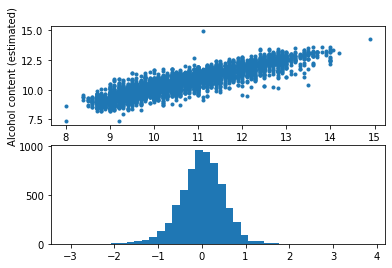

Ran Exercise 5.2.4


In [13]:
# exercise 5.2.4
from matplotlib.pylab import figure, subplot, plot, xlabel, ylabel, hist, show
import sklearn.linear_model as lm
#import import_ipynb
#import Decision_tree

# requires wine data from exercise 5.1.5
#from ex5_1_5 import *

# Split dataset into features and target vector
alcohol_idx = attributeNames.index('Alcohol')
y = X[:,alcohol_idx]

X_cols = list(range(0,alcohol_idx)) + list(range(alcohol_idx+1,len(attributeNames)))
X = X[:,X_cols]

# Fit ordinary least squares regression model
model = lm.LinearRegression()
model.fit(X,y)

# Predict alcohol content
y_est = model.predict(X)
residual = y_est-y

# Display scatter plot
figure()
subplot(2,1,1)
plot(y, y_est, '.')
xlabel('Alcohol content (true)'); ylabel('Alcohol content (estimated)');
subplot(2,1,2)
hist(residual,40)

show()

print('Ran Exercise 5.2.4')

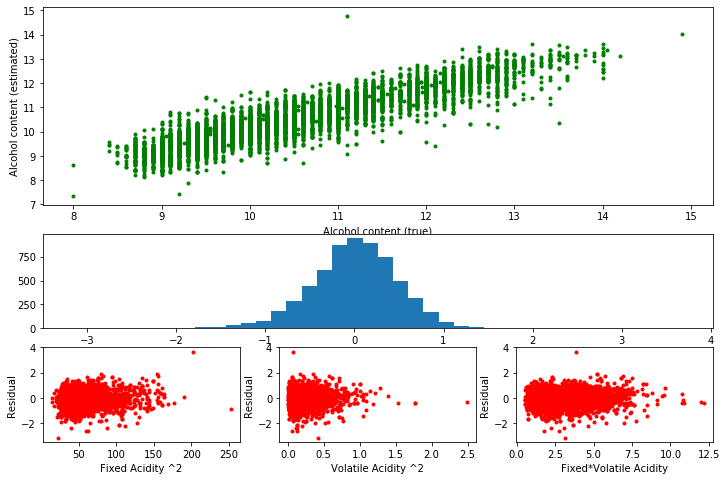

Ran Exercise 5.2.5


In [16]:
# exercise 5.2.5
from matplotlib.pylab import figure, plot, subplot, xlabel, ylabel, hist, show
import sklearn.linear_model as lm

# requires data from exercise 5.1.4
#from ex5_1_5 import *


# Split dataset into features and target vector
alcohol_idx = attributeNames.index('Alcohol')
y = X[:,alcohol_idx]

X_cols = list(range(0,alcohol_idx)) + list(range(alcohol_idx+1,len(attributeNames)))
X = X[:,X_cols]

# Additional nonlinear attributes
fa_idx = attributeNames.index('Fixed acidity')
va_idx = attributeNames.index('Volatile acidity')
Xfa2 = np.power(X[:,fa_idx],2).reshape(-1,1)
Xva2 = np.power(X[:,va_idx],2).reshape(-1,1)
Xfava = (X[:,fa_idx]*X[:,va_idx]).reshape(-1,1)
X = np.asarray(np.bmat('X, Xfa2, Xva2, Xfava'))

# Fit ordinary least squares regression model
model = lm.LinearRegression()
model.fit(X,y)

# Predict alcohol content
y_est = model.predict(X)
residual = y_est-y

# Display plots
figure(figsize=(12,8))

subplot(2,1,1)
plot(y, y_est, '.g')
xlabel('Alcohol content (true)'); ylabel('Alcohol content (estimated)')

subplot(4,1,3)
hist(residual,40)

subplot(4,3,10)
plot(Xfa2, residual, '.r')
xlabel('Fixed Acidity ^2'); ylabel('Residual')

subplot(4,3,11)
plot(Xva2, residual, '.r')
xlabel('Volatile Acidity ^2'); ylabel('Residual')

subplot(4,3,12)
plot(Xfava, residual, '.r')
xlabel('Fixed*Volatile Acidity'); ylabel('Residual')

show()

print('Ran Exercise 5.2.5')

# logistic regression

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Probability of given sample being a white wine: 0.9988

Overall misclassification rate: 0.018


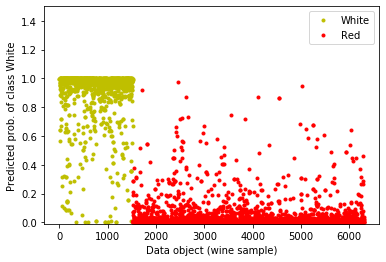

Ran Exercise 5.2.6


In [14]:
# exercise 5.2.6
from matplotlib.pylab import figure, plot, xlabel, ylabel, legend, ylim, show
import sklearn.linear_model as lm

# requires data from exercise 5.1.4
#from ex5_1_5 import *

# Fit logistic regression model
model = lm.logistic.LogisticRegression()
model = model.fit(X,y)

# Classify wine as White/Red (0/1) and assess probabilities
y_est = model.predict(X)
y_est_white_prob = model.predict_proba(X)[:, 0] 

# Define a new data object (new type of wine), as in exercise 5.1.7
x = np.array([6.9, 1.09, .06, 2.1, .0061, 12, 31, .99, 3.5, .44, 12]).reshape(1,-1)
# Evaluate the probability of x being a white wine (class=0) 
x_class = model.predict_proba(x)[0,0]

# Evaluate classifier's misclassification rate over entire training data
misclass_rate = np.sum(y_est != y) / float(len(y_est))

# Display classification results
print('\nProbability of given sample being a white wine: {0:.4f}'.format(x_class))
print('\nOverall misclassification rate: {0:.3f}'.format(misclass_rate))

f = figure();
class0_ids = np.nonzero(y==0)[0].tolist()
plot(class0_ids, y_est_white_prob[class0_ids], '.y')
class1_ids = np.nonzero(y==1)[0].tolist()
plot(class1_ids, y_est_white_prob[class1_ids], '.r')
xlabel('Data object (wine sample)'); ylabel('Predicted prob. of class White');
legend(['White', 'Red'])
ylim(-0.01,1.5)

show()

print('Ran Exercise 5.2.6')

In [16]:
y_est

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
y_est_white_prob

array([9.98737079e-01, 9.98879448e-01, 9.97669274e-01, ...,
       2.03679790e-02, 8.59835197e-04, 1.68617338e-03])